# Initial setup

In [100]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [143]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM account;', con, index_col='id')
df.head()

,districtId,frequency,date
id,,,
576,55,monthly issuance,930101
3818,74,monthly issuance,930101
704,55,monthly issuance,930101
2378,16,monthly issuance,930101
2632,24,monthly issuance,930102


# Pre-processing

In [144]:
df['date'] = pd.to_datetime(df['date'], format='%y%m%d')
df.head()

,districtId,frequency,date
id,,,
576,55,monthly issuance,1993-01-01
3818,74,monthly issuance,1993-01-01
704,55,monthly issuance,1993-01-01
2378,16,monthly issuance,1993-01-01
2632,24,monthly issuance,1993-01-02


# Analyzing frequency

In [145]:
print(df['frequency'].unique())

['monthly issuance' 'issuance after transaction' 'weekly issuance']


(array([0, 1, 2]),
 [Text(0, 0, 'monthly issuance'),
  Text(1, 0, 'issuance after transaction'),
  Text(2, 0, 'weekly issuance')])

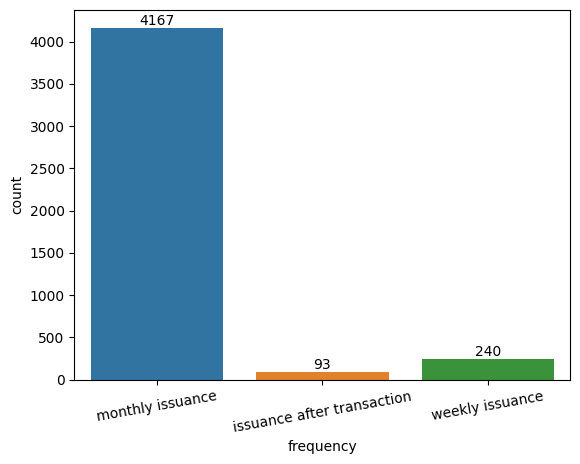

In [146]:
ax = sns.countplot(df, x='frequency')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)

It's much more frequent `monthly issuance` than `issuance after transaction` and `weekly issuance`.

# Analyzing date

[Text(0, 0, '1139'),
 Text(0, 0, '439'),
 Text(0, 0, '661'),
 Text(0, 0, '1363'),
 Text(0, 0, '898')]

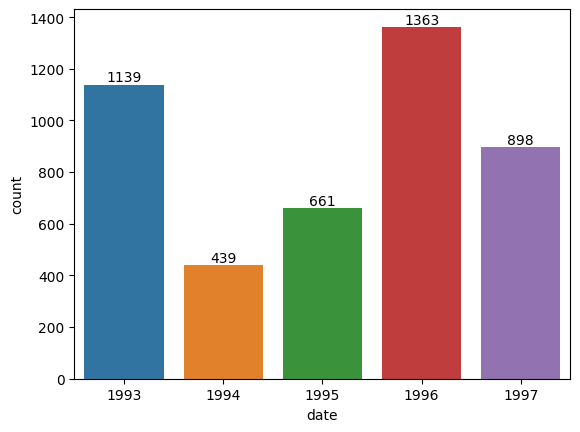

In [147]:
ax = sns.countplot(df, x=df['date'].dt.strftime('%Y'))
ax.bar_label(ax.containers[0])

There's very few new accounts between 1994 and 1995. Maybe due to the dissolution of Czechoslovakia.

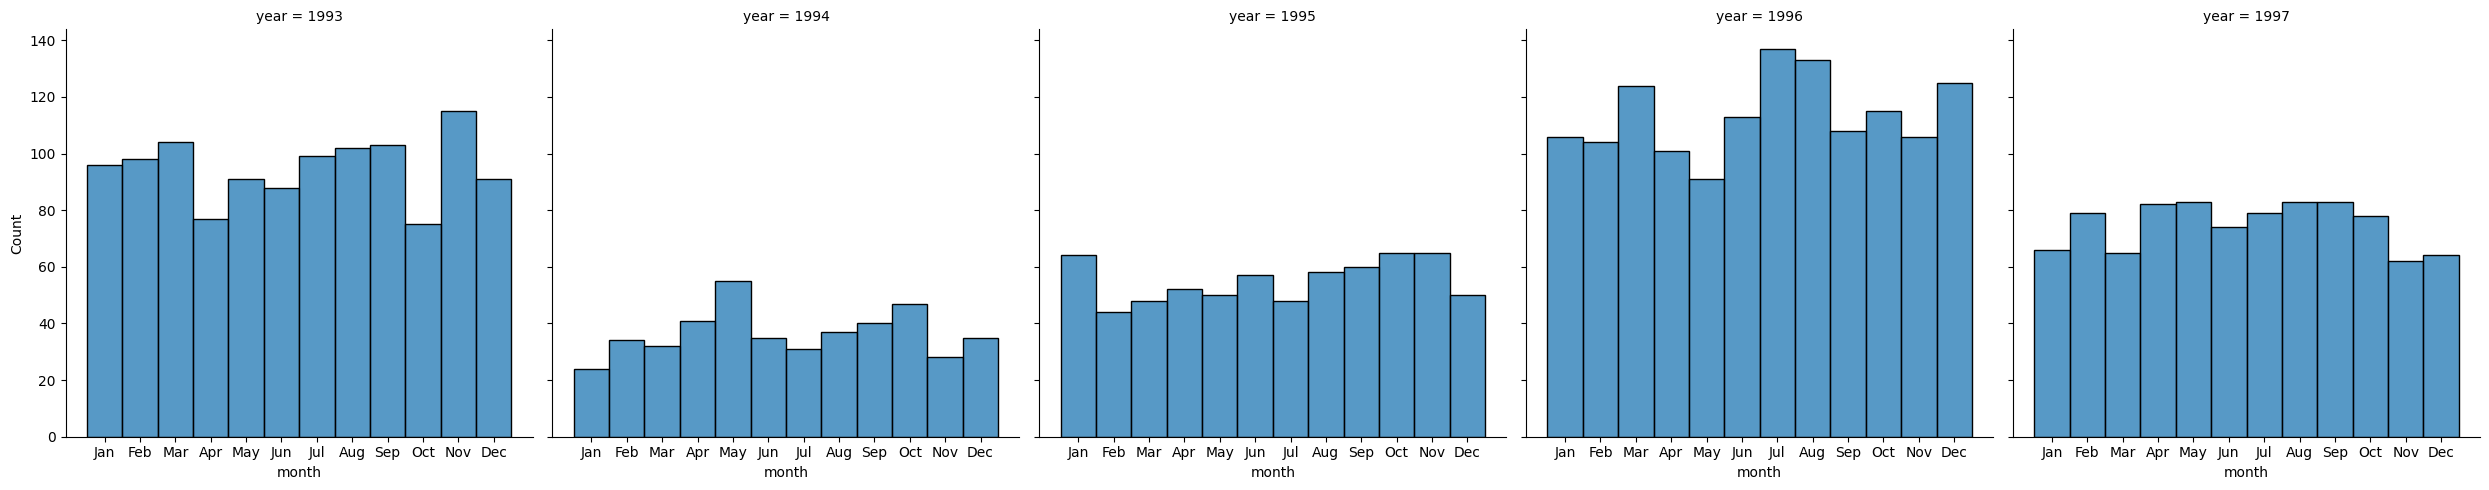

In [148]:
temp = df.copy()
temp['month'] = temp['date'].dt.strftime('%b')
temp['year'] = temp['date'].dt.strftime('%Y')
sns.displot(temp, x='month', col='year')

There's no apparent trend (e.g. more accounts created during summer).

# Analyzing district

[Text(0, 0, '554'),
 Text(0, 0, '152'),
 Text(0, 0, '135'),
 Text(0, 0, '128'),
 Text(0, 0, '92'),
 Text(0, 0, '88'),
 Text(0, 0, '83'),
 Text(0, 0, '65'),
 Text(0, 0, '59'),
 Text(0, 0, '57')]

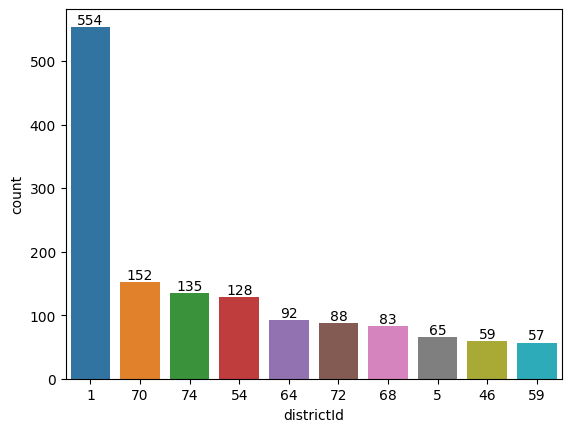

In [176]:
ax = sns.countplot(df, x='districtId', order=df['districtId'].value_counts().iloc[:10].index)
ax.bar_label(ax.containers[0])

In [184]:
district = pd.read_sql_query('SELECT * FROM district;', con, index_col='id')

In [186]:
district.corrwith(df['districtId'].value_counts(), numeric_only=True)

nInhabitants                            0.818009
nMunicipalitiesSub499Inhabitants       -0.098078
nMunicipalities500to1999Inhabitants    -0.226936
nMunicipalities2000to9999Inhabitants   -0.232959
nMunicipalitiesOver10000Inhabitants    -0.109335
nCities                                -0.261497
urbanInhabitantsRatio                   0.194260
averageSalary                           0.513878
unemploymentRate96                     -0.262063
nEnterpreneursPer1000Inhabitants        0.398753
commitedCrimes96                        0.900715
dtype: float64

In [187]:
district.sort_values('nInhabitants', ascending=False).iloc[:10][['districtName', 'region', 'nInhabitants', 'averageSalary']]

,districtName,region,nInhabitants,averageSalary
id,,,,
1,Hl.m. Praha,Prague,1204953,12541
54,Brno - mesto,south Moravia,387570,9897
74,Ostrava - mesto,north Moravia,323870,10673
70,Karvina,north Moravia,285387,10177
68,Frydek - Mistek,north Moravia,228848,9893
72,Olomouc,north Moravia,226122,8994
64,Zlin,south Moravia,197099,9624
73,Opava,north Moravia,182027,8746
14,Ceske Budejovice,south Bohemia,177686,10045


There are many values for `districtId` 1, looks like it's directly related to the `nInhabitants` and partially related to the `averageSalary`.